In [41]:
# Multi-feature Revenue & Profit Optimization

# This model uses 3 features To model demand, and then simulate revenue and profit across a full price range using a polynomial multi-feature regression.

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
# 2. Load dataset
df = pd.read_csv(r"D:\JOB\1 Pricing analyst\2 Revenue and profit optimization model\1 Revenue Maximization & Cost-Based Pricing\Linear_programming_dataset.csv")

In [6]:
df

,product_id,price,demand,cost_per_unit,production_capacity,revenue,profit
0,1,193.524658,18.397192,83.131458,144,3560.310362,2030.924938
1,2,475.850010,10.000000,43.653409,762,4758.500101,4321.966009
2,3,368.677031,15.506100,91.946021,216,5716.743008,4291.018784
3,4,303.342657,10.613643,82.237362,221,3219.570730,2346.732714
4,5,86.449134,63.400651,193.124870,581,5480.931360,-6763.311120
...,...,...,...,...,...,...,...
9995,9996,430.251434,11.480490,168.159618,734,4939.497346,3008.942509
9996,9997,449.779329,15.078538,137.054489,653,6782.014546,4715.433279
9997,9998,473.886878,15.523632,290.544484,268,7356.445427,2846.139834
9998,9999,204.769116,20.931096,141.918700,519,4286.042110,1315.528113


In [3]:
# 3. Define features and target
features = ['price', 'cost_per_unit', 'production_capacity']
X = df[features]
y = df['demand']

In [4]:
# 4. Use Polynomial Features (degree=2) for non-linear modeling
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [5]:
# 5. Train model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [35]:
# 6. Simulate demand for a range of price values
price_range = np.linspace(df['price'].min(), df['price'].max(), 200)
avg_cost = df['cost_per_unit'].mean()
avg_capacity = df['production_capacity'].mean()

sim_df = pd.DataFrame({
    'price': price_range,
    'cost_per_unit': avg_cost,
    'production_capacity': avg_capacity
})

In [36]:
# 7. Transform simulation data and predict demand
sim_poly = poly.transform(sim_df)
predicted_demand = model.predict(sim_poly)

In [38]:
# 8. Calculate revenue and profit
revenue = price_range * predicted_demand
profit = (price_range - avg_cost) * predicted_demand

# 9. Find optimal price points
best_revenue_idx = np.argmax(revenue)
best_profit_idx = np.argmax(profit)

In [39]:
# 10. Print results
print(f"🔹 Best Price for Max Revenue: ${price_range[best_revenue_idx]:.2f}")
print(f"   ➤ Maximum Revenue: ${revenue[best_revenue_idx]:,.2f}")
print(f"\n🔹 Best Price for Max Profit:  ${price_range[best_profit_idx]:.2f}")
print(f"   ➤ Maximum Profit: ${profit[best_profit_idx]:,.2f}")

🔹 Best Price for Max Revenue: $499.86
   ➤ Maximum Revenue: $21,814.65

🔹 Best Price for Max Profit:  $499.86
   ➤ Maximum Profit: $15,201.07


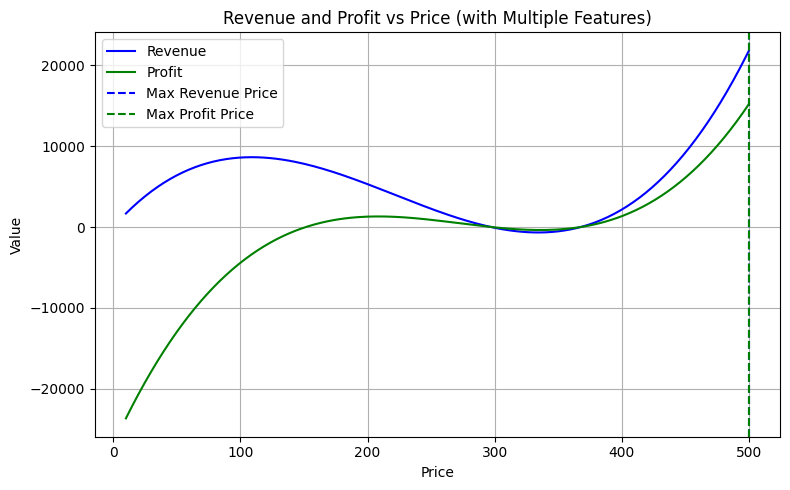

In [40]:
# 11. Plot
plt.figure(figsize=(8, 5))
plt.plot(price_range, revenue, label="Revenue", color='blue')
plt.plot(price_range, profit, label="Profit", color='green')
plt.axvline(price_range[best_revenue_idx], linestyle="--", color='blue', label="Max Revenue Price")
plt.axvline(price_range[best_profit_idx], linestyle="--", color='green', label="Max Profit Price")
plt.xlabel("Price")
plt.ylabel("Value")
plt.title("Revenue and Profit vs Price (with Multiple Features)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()